In [1]:
from utils import  plot_comp_invivo, monte_carlo_dropout_analysis, plot_comp_mc_dropout
from dataset import read_brainweb_sim_data, read_brainweb_sim_data_comp, read_data_invivo
import glob
import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
#from model import UnetModel
import torch

import tqdm

from model import UnetModel

plt.rcParams.update({'font.size': 20})

In [2]:
# init the classification model
input_size = (64, 64)
spatial_dims = 2 
num_channels = 40 #metabolies*tpts

model = UnetModel.load_from_checkpoint("/home/ssahin/kpl-est-dl/checkpoints/version_21/epoch=2999-val_loss=3.66.ckpt", input_size=input_size, spatial_dims=spatial_dims, num_channels=num_channels, dropout=0.3)

BasicUNet features: (32, 32, 64, 128, 256, 32).


In [3]:
model.eval()
for m in model.modules():  #set Dropout models to train to allow dropout in eval mode
    #print(m.__class__.__name__)
    if m.__class__.__name__.startswith('Dropout'):
        #print(m.__class__.__name__)
        m.train()

In [4]:
data_path_test = "/data/ssahin/kpl_dl_sim/brainweb_9_2/invivo_test/"
list_val = glob.glob(data_path_test + '/*.h5')
#data_path_test = "/data/ssahin/kpl_dl_sim/brainweb_6_24/invivo_test/11_3_4.h5"
dict = read_data_invivo(list_val[10]) #54, 20
print(list_val[10])

/data/ssahin/kpl_dl_sim/brainweb_9_2/invivo_test/10_6_5.h5


torch.Size([1, 40, 64, 64])


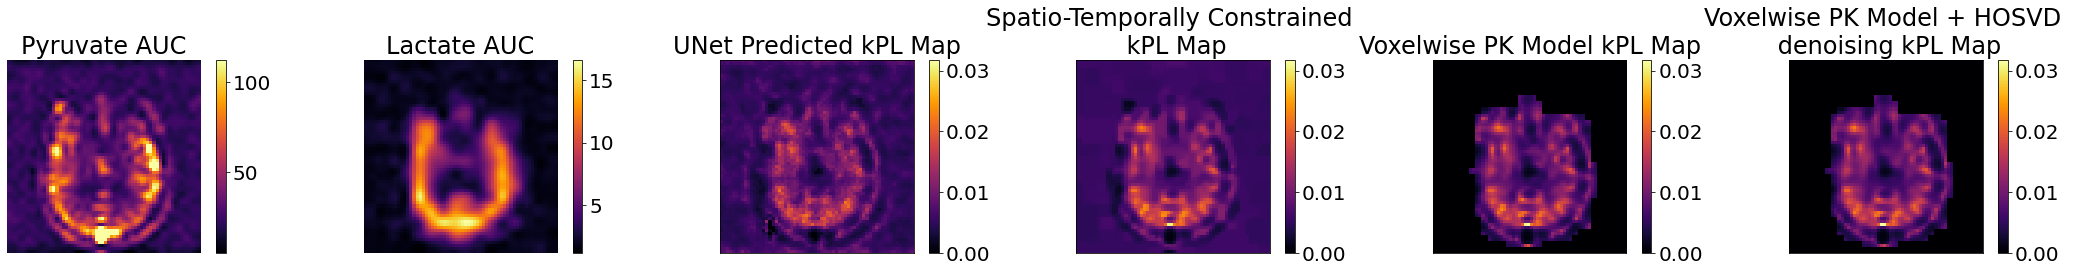

In [5]:
x = torch.from_numpy(dict["data"])
x = x[None, :, :, :]
print(x.shape)
with torch.no_grad():
    kpl_pred = model(x)
kpl_pred_np = np.squeeze(kpl_pred.numpy())

plot_comp_invivo(dict["data"], kpl_pred_np, dict["kPL_const"], dict["kPL_PK"], dict["kPL_denoise_PK"], dict["mask"])

In [5]:

[mean_map, var_map, kpl_preds] = monte_carlo_dropout_analysis(dict["data"], model, its=100, map_size=[64, 64])



  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:03<00:00, 26.22it/s]


In [7]:
print(np.min(dict["lac_rsq_PK"]))

-3.958702996862119


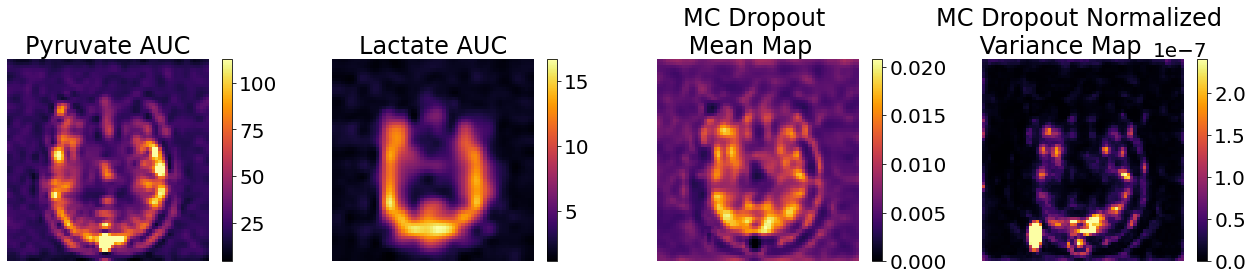

In [6]:
plot_comp_mc_dropout(dict["data"], mean_map, var_map)

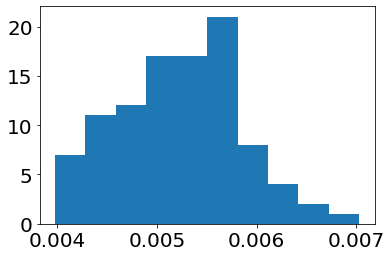

In [16]:
vox1= np.squeeze(kpl_preds[32,32,:])

import matplotlib.pyplot as plt

plt.hist(vox1)
plt.show()

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

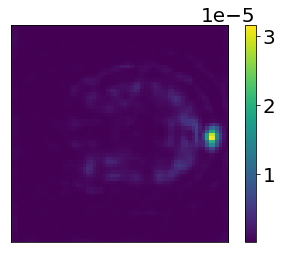

In [19]:
plt.imshow(var_map)
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.imshow

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

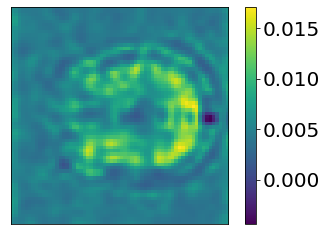

In [20]:
plt.imshow(mean_map)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.imshow